In [4]:
import proplot as pplt
import os
import pandas as pd

# proplot is a wrapper for the matplotlib and cartopy libraries that makes
# plotting maps a lot more pleasant. unfortunately it hasn't been updated 
# in a while, hence the environment file setting python to version 3.9


# loading the buoy data into a dictionary makes it easy to iterate through buoys
buoy_data = {}
save_loc = '../data/iabp/clean/'
for year in range(2003, 2022):
    files = os.listdir(save_loc + str(year))
    print(year, len(files))
    if len(files) > 0:
        buoy_data[year] = {}
        for f in files:
            if '.' != f[0]:
                buoy_data[year][f.replace('.csv', '')] = pd.read_csv(save_loc + str(year) + '/' + f, parse_dates=True)

# This also prints the number of buoys available per year. 
# I've been running Alan's version of my buoy processing code,
# which appears to be overly stringent for data from the first few years
# of the IABP dataset. That's why there's 0 buoys for those years
# I haven't re-run the data processing after 2016 so that's why those folders are empty.

2003 0
2004 0
2005 0
2006 0
2007 0
2008 0
2009 1
2010 3
2011 16
2012 23
2013 27
2014 54
2015 102
2016 98
2017 0
2018 0
2019 0
2020 0
2021 0


/Users/dmw/miniconda3/envs/airsea/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


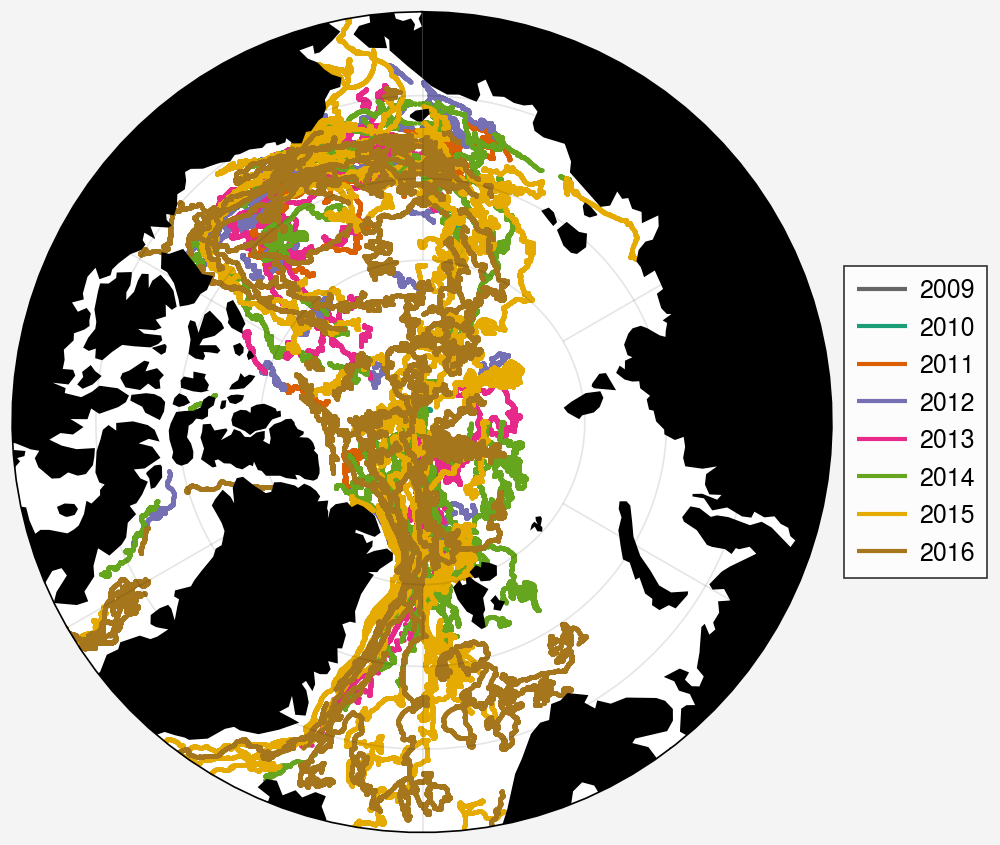

In [7]:
# Making a "spaghetti plot" with all the trajectories on it

# proplot has a nice utility to loop through color maps and cycles
# you can see more in the proplot documentation 
colors = {y: c['color'] for y, c in zip(
            range(2002, 2023),
            pplt.Cycle('dark2', 21))}

# we create a figure and axis object -- here the figure only has one panel, 
# but for more complex figures, it's helpful to be able to loop through as set 
# of axes. 'npstere' is a geographic projection (mapping from true 3d coordinates
# to a flat 2d map) called the "North Polar Stereographic Projection".

fig, ax = pplt.subplots(proj='npstere', width=5)
ax.format(boundinglat=65, land=True)
for year in buoy_data:
    for buoy in buoy_data[year]:
        ax.scatter(buoy_data[year][buoy].longitude,
                buoy_data[year][buoy].latitude, ms=1, color=colors[year])

# a little trick to make a legend: plot nothing, with the color options you want
h = [ax.plot([],[], color=colors[year]) for year in buoy_data]
l = [year for year in buoy_data]
ax.legend(h, l, loc='r', ncols=1)